In [1]:
import pandas as pd
import numpy as np


In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing

In [3]:
#here double and triple exponential smoothing is done in exponentialsmoothing

In [4]:
from statsmodels.tsa.seasonal import STL

In [5]:
# STL is used for visualization of data and to do ETS decomposition

In [6]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\Air Passengers.csv",parse_dates=True)
df.index.freq='MS'

In [7]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [11]:
df.index.freq="MS"

In [12]:
df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Air Line Passengers Data')

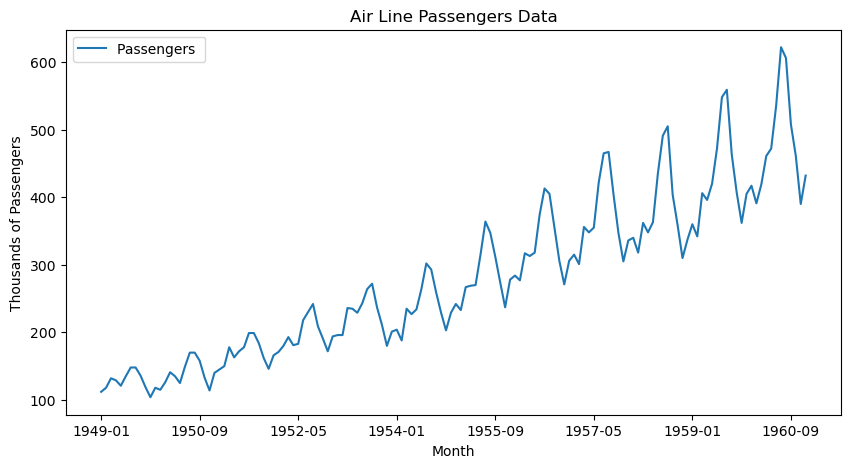

In [20]:
plt.figure(figsize=(10,5))
df['#Passengers'].plot(legend=True,label='Passengers ')
plt.ylabel('Thousands of Passengers')
plt.title('Air Line Passengers Data')

### ETS decomposition of the data

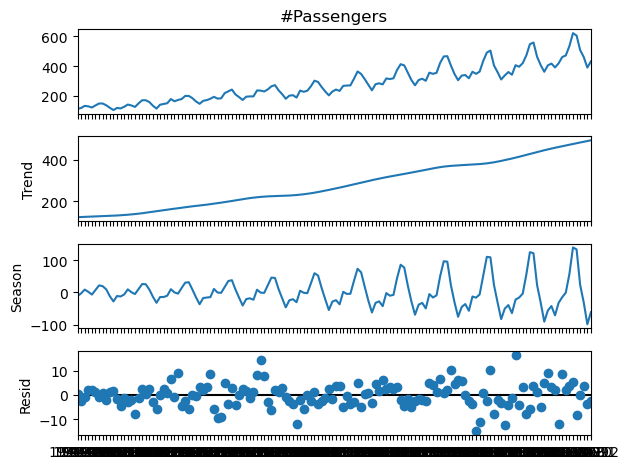

In [92]:
decomposition=STL(df1,period=12).fit()
decomposition.plot()
plt.show()

### here we can understand that the data have trend and seasonality

In [15]:
df1=df['#Passengers']

In [16]:
train_data=df.iloc[:108]
test_data=df.iloc[108:]

In [17]:
train_data_len=int(len(df)*0.75)

In [18]:
test_data_len=int(len(df)*0.25)

In [19]:
train_data

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1957-08,467
1957-09,404
1957-10,347


In [20]:
test_data

,#Passengers
Month,
1958-01,340
1958-02,318
1958-03,362
1958-04,348
1958-05,363
1958-06,435
1958-07,491
1958-08,505
1958-09,404


### simplesmoothing

In [21]:
model=SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=0.2)#smoothing level is alpha

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [22]:
test_forcasting=model.forecast(test_data_len)#here the period of test data should be passed

In [23]:
test_forcasting


1958-01-01    362.803041
1958-02-01    362.803041
1958-03-01    362.803041
1958-04-01    362.803041
1958-05-01    362.803041
1958-06-01    362.803041
1958-07-01    362.803041
1958-08-01    362.803041
1958-09-01    362.803041
1958-10-01    362.803041
1958-11-01    362.803041
1958-12-01    362.803041
1959-01-01    362.803041
1959-02-01    362.803041
1959-03-01    362.803041
1959-04-01    362.803041
1959-05-01    362.803041
1959-06-01    362.803041
1959-07-01    362.803041
1959-08-01    362.803041
1959-09-01    362.803041
1959-10-01    362.803041
1959-11-01    362.803041
1959-12-01    362.803041
1960-01-01    362.803041
1960-02-01    362.803041
1960-03-01    362.803041
1960-04-01    362.803041
1960-05-01    362.803041
1960-06-01    362.803041
1960-07-01    362.803041
1960-08-01    362.803041
1960-09-01    362.803041
1960-10-01    362.803041
1960-11-01    362.803041
1960-12-01    362.803041
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

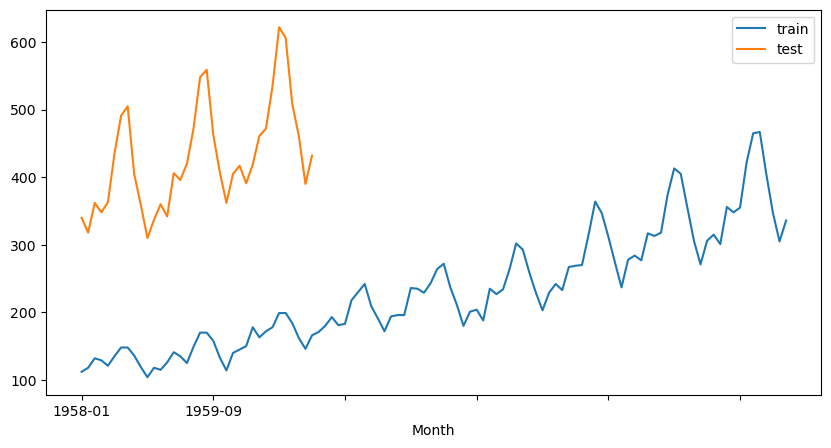

In [24]:
plt.figure(figsize=(10,5))
train_data['#Passengers'].plot(label='train',legend=True)
test_data['#Passengers'].plot(label='test',legend=True)


<Axes: >

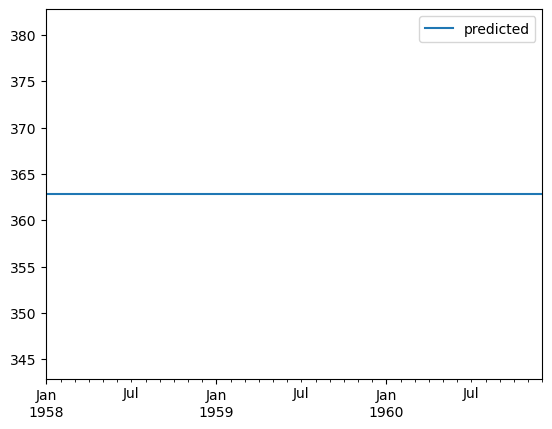

In [25]:
test_forcasting.plot(label='predicted',legend=True)

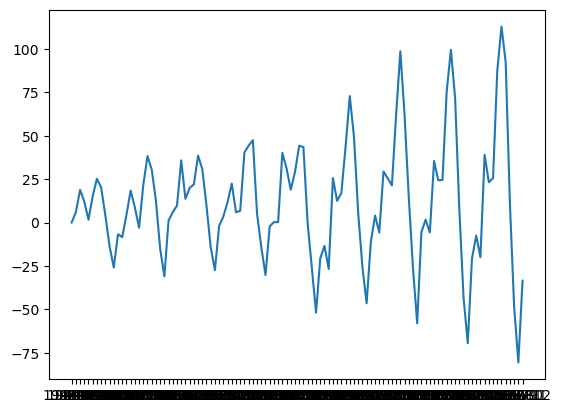

In [26]:
#these are the error in the data
plt.plot(model.resid)
plt.show()
#as per the rules of error the error should not have patterns or the errors should have constant variations .but here the errors have a pattern and variations are not constant .from this we can understand that this model is not a good one 

### here the simple exponential smoothing wont work ,the predicted values are same.

### here simple exponential wont work because we have trend and seasonality in the data

In [27]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [28]:
model_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [29]:
mse=mean_absolute_error(test_data['#Passengers'],test_forcasting)

In [30]:
rmse=np.sqrt(mse)

In [31]:
mae=mean_absolute_error(test_data['#Passengers'],test_forcasting)

In [32]:
mape=mean_absolute_percentage_error(test_data['#Passengers'],test_forcasting)

In [33]:
model_metrics['simple exponentional smoothing']=[mse,rmse,mae,mape]


In [34]:
model_metrics

,simple exponentional smoothing
MSE,76.254204
RMSE,8.732365
MAE,76.254204
MAPE,0.158813


### DOUBLE EXPONENTIAL SMOOTHING

In [77]:
model_double=ExponentialSmoothing(train_data,trend='add').fit()#here we include trend(linear trend or additive--->add ,nonlinear trend or multiplicative----->mul)

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
test_forcasting1=model_double.forecast(test_data_len)

<Axes: >

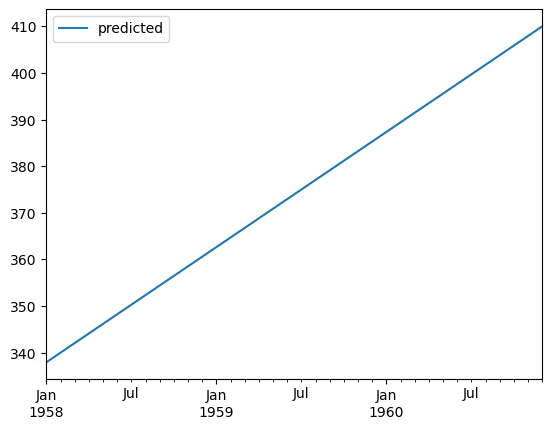

In [37]:
test_forcasting1.plot(label='predicted',legend=True)

### here the model is able to predict trend but not seasonality .because in double exponential smoothing it only have trend 

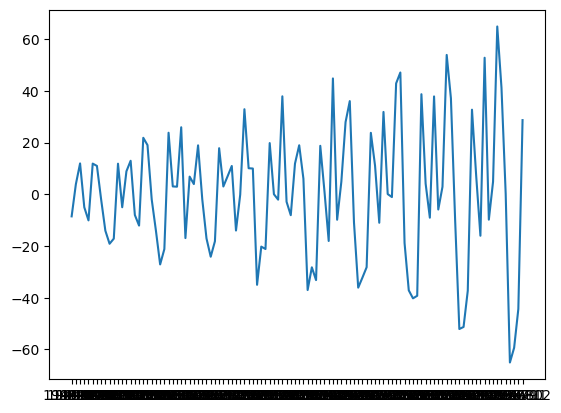

In [38]:
plt.plot(model_double.resid)

### here also there is a pattern in the error

In [40]:
mse1=mean_absolute_error(test_data['#Passengers'],test_forcasting1)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(test_data['#Passengers'],test_forcasting1)
mape1=mean_absolute_percentage_error(test_data['#Passengers'],test_forcasting1)

In [41]:
model_metrics['double exponentional smoothing']=[mse1,rmse1,mae1,mape1]


In [42]:
model_metrics

,simple exponentional smoothing,double exponentional smoothing
MSE,76.254204,63.343307
RMSE,8.732365,7.958851
MAE,76.254204,63.343307
MAPE,0.158813,0.130924


### TRIPLE EXPONENTIAL SMOOTHING

In [78]:
triple_model=ExponentialSmoothing(train_data,trend='add',seasonal='add').fit()# here the trend is additive and seasonality is multiplicative

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
test_forcasting2=triple_model.forecast(test_data_len)

<Axes: >

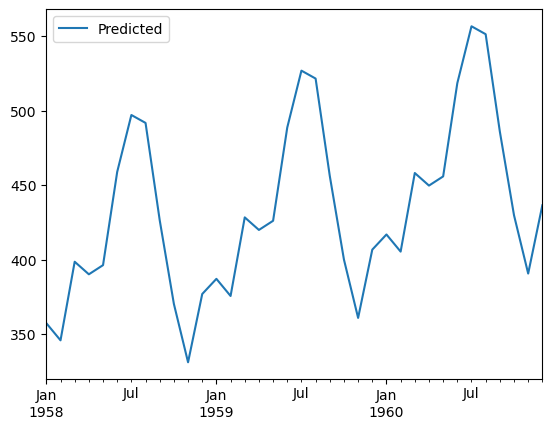

In [45]:
test_forcasting2.plot(label='Predicted',legend=True)

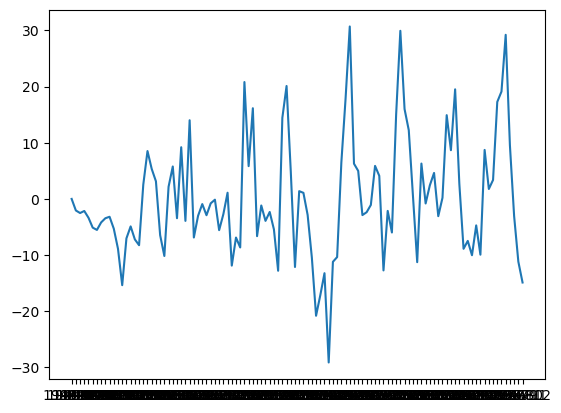

In [46]:
plt.plot(triple_model.resid)

<Axes: ylabel='Count'>

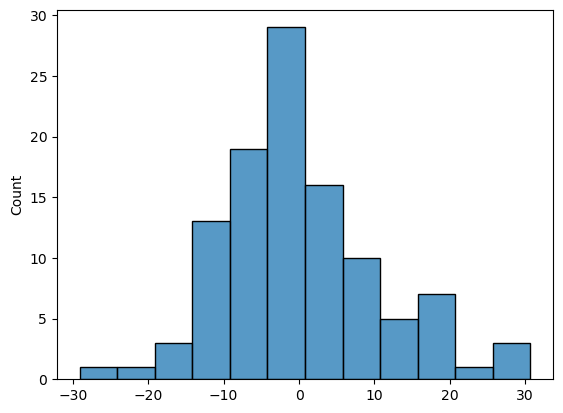

In [100]:
sns.histplot(triple_model.resid)

In [99]:
triple_model.resid.mean()

7.454561167858426e-06

### here there is no pattern in the errors 

In [74]:
mse2=mean_absolute_error(test_data['#Passengers'],test_forcasting2)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(test_data['#Passengers'],test_forcasting2)
mape2=mean_absolute_percentage_error(test_data['#Passengers'],test_forcasting2)

In [75]:
model_metrics['Triple']=[mse2,rmse2,mae2,mape2]

In [76]:
model_metrics

,simple exponentional smoothing,double exponentional smoothing,Triple
MSE,76.254204,63.343307,21.544811
RMSE,8.732365,7.958851,4.641639
MAE,76.254204,63.343307,21.544811
MAPE,0.158813,0.130924,0.051142


### here we are selecting this triple model

In [79]:
retrain_triple=ExponentialSmoothing(df,trend='add',seasonal='add').fit() 

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [80]:
retrain_forecasting=retrain_triple.forecast(test_data_len)

<Axes: >

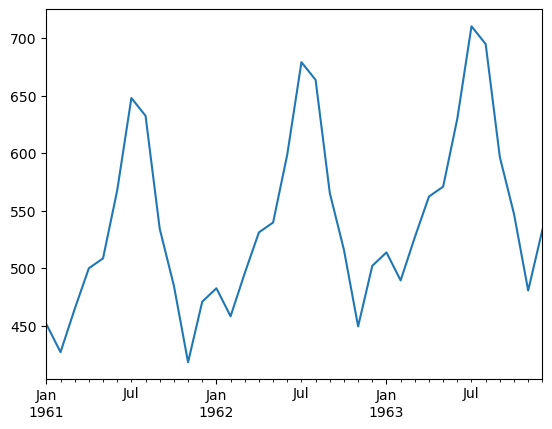

In [85]:

retrain_forecasting.plot()

<Axes: xlabel='Month'>

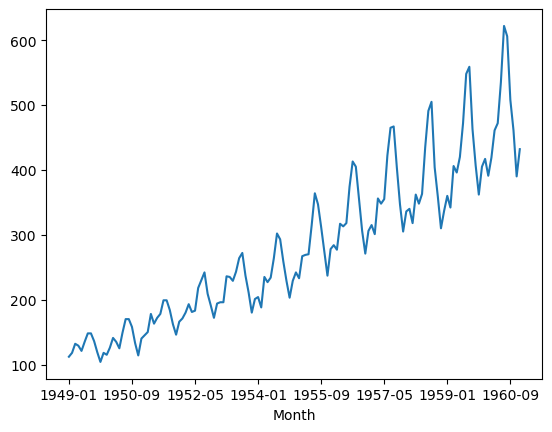

In [90]:
df['#Passengers'].plot()